In [1]:
import pandas as pd 
import seaborn as sns 
import sklearn 

In [2]:
df = pd.read_csv('sales.csv')
df

,Weeks,Total
0,4,88
1,20,62
2,52,118
3,56,149
4,72,193
5,80,167
6,168,192
7,200,229
8,228,319
9,296,311


In [4]:
X= df[['Weeks']]
Y = df[['Total']]

In [5]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [7]:
print(f"total = {model.intercept_[0]} + {model.coef_[0][0]} Weeks")

total = 115.99495038611639 + 0.5313109794071246 Weeks


In [8]:
y_pred = model.predict(X)

In [9]:
from sklearn import metrics 
import numpy as np

mae = metrics.mean_absolute_error(Y,y_pred)
mse  = metrics.mean_squared_error(Y,y_pred) 
rmse = np.sqrt(mse) 


print(f'MAE = {mae}')
print(f"RMSE = {rmse}")



MAE = 37.40842605663041
RMSE = 43.76964839153792


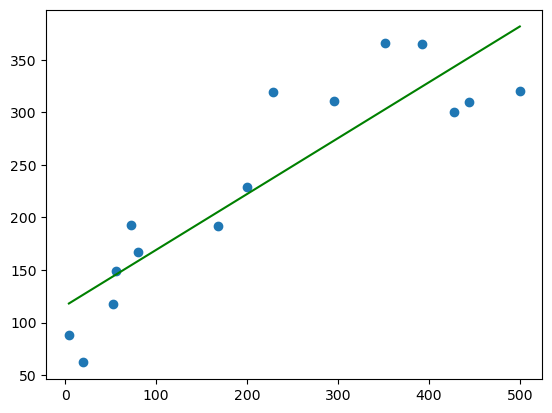

In [11]:
df['Prediction'] = model.predict(X)
import matplotlib.pyplot as plt 
plt.scatter(df['Weeks'],df['Total'])
plt.plot(df['Weeks'],df['Prediction'],color='green')

In [13]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree=2,include_bias=False ) ## include_bias=False remove B0*X^0
X_new = poly.fit_transform(X)
X_new

array([[4.00000e+00, 1.60000e+01],
       [2.00000e+01, 4.00000e+02],
       [5.20000e+01, 2.70400e+03],
       [5.60000e+01, 3.13600e+03],
       [7.20000e+01, 5.18400e+03],
       [8.00000e+01, 6.40000e+03],
       [1.68000e+02, 2.82240e+04],
       [2.00000e+02, 4.00000e+04],
       [2.28000e+02, 5.19840e+04],
       [2.96000e+02, 8.76160e+04],
       [3.52000e+02, 1.23904e+05],
       [3.92000e+02, 1.53664e+05],
       [4.28000e+02, 1.83184e+05],
       [4.44000e+02, 1.97136e+05],
       [5.00000e+02, 2.50000e+05]])

In [17]:
model2 = LinearRegression() 
model2.fit(X_new,Y)
print(f"total = {model2.intercept_[0]} + {model2.coef_[0][0]} Weeks + {model2.coef_[0][1]} Weeks^2")

total = 65.9871074055043 + 1.3330872083480743 Weeks + -0.0016667340368720846 Weeks^2


In [19]:
y_pred2 = model2.predict(X_new)

In [20]:
mae = metrics.mean_absolute_error(Y,y_pred2)
mse  = metrics.mean_squared_error(Y,y_pred2) 
rmse = np.sqrt(mse) 


print(f'MAE = {mae}')
print(f"RMSE = {rmse}")


MAE = 24.62724256032611
RMSE = 28.50057144302992


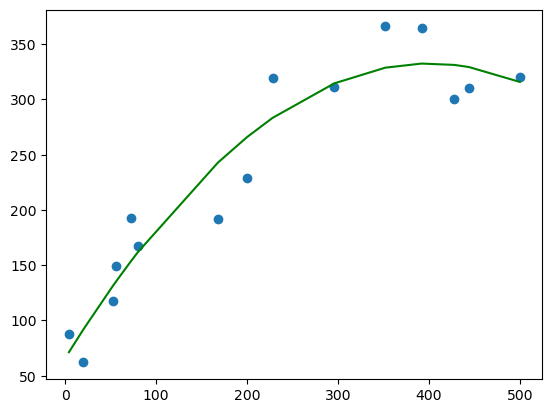

In [21]:
df['Prediction2'] = model2.predict(X_new)

plt.scatter(df['Weeks'],df['Total'])
plt.plot(df['Weeks'],df['Prediction2'],color='green')